# 데이터 불러오기

In [6]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [2]:
plt.rc('font', family=font_name)

In [3]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

sns.set_palette("bright")
sns.set_style('darkgrid')

In [5]:
demo = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_01_DEMO.csv")
pdde = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_02_PDDE.csv")
cop = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_03_COP_U.csv")
pd_clac = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_05_BR.csv")
lpay = pd.read_csv("/content/mnt/MyDrive/LDA/data/LPOINT_BIG_COMP_06_LPAY.csv")
# 외부 변수
holiday = pd.read_csv("/content/mnt/MyDrive/LDA/data/holiday.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 도구 함수

In [7]:
def get_season(x):
  x = int(x)
  if 3 <= x < 6:
    return 0
  elif 6 <= x < 9:
    return 1
  elif 9 <= x <12:
    return 2
  else:
    return 3

def make_time_feats(df):
  """
  시간 변수를 생성
  """
  df['de_dt'] = df['de_dt'].astype("str")
  df['vst_dt'] = df['vst_dt'].astype("str")

  df["de_dt"] = pd.to_datetime(df['de_dt'])  
  df["vst_dt"] = pd.to_datetime(df['vst_dt'])

  df['de_dow'] = df['de_dt'].dt.dayofweek
  df['de_day'] = df['de_dt'].dt.day
  df['de_month'] = df['de_dt'].dt.month.apply(lambda x : f"{x:0>2}") # zero-pad
  df["de_day"] = df['de_dt'].dt.day.apply(lambda x : f"{x:0>2}") # zero-pad
  df["de_hr"] = df["de_hr"].apply(lambda x : f"{x:0>2}") # zero-pad
  df['de_hday'] = df['de_dow'].apply(lambda x : 1 if x == 5 or x == 6 else 0)
  df['de_season'] = df['de_month'].apply(lambda x : get_season(x))

  hday = set(holiday['날짜'].unique())
  df.loc[df.de_dt.isin(hday), "de_hday"] = 1

In [8]:
def pie_chart(data, cat, figsize):
  """
  파이 차트를 그립니다.
  args
    - data : pd.DataFrame
    - cat : 카테고리 이름
    - figsize : figsize
  """
  fig, axs = plt.subplots(figsize = figsize)
  pie_idx, pie_value = data[cat].value_counts().index, data[cat].value_counts().values
  axs.pie(pie_value, labels = pie_idx, autopct = "%.1f")
  plt.title(f"{cat}")
  plt.show()

In [9]:
make_time_feats(cop)

In [10]:
demo['ma_fem_dv_ages'] = demo['ma_fem_dv'] + demo['ages']

#3. *BR*
- : 제휴사/유통사 정보
- `A01 ~ A06` : 유통사
- `B01` : 숙박업종
- `C01~02` : 엔터테인먼트
- `D01~02` : F&B
- `E01` : 렌탈업종   

## A.데이터 확인

In [11]:
br

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [12]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   br_c      8808 non-null   object
 1   cop_c     8808 non-null   object
 2   zon_hlv   8808 non-null   object
 3   zon_mcls  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


### 결측치 확인

In [13]:
br.isnull().sum()

br_c        0
cop_c       0
zon_hlv     0
zon_mcls    0
dtype: int64

### 원소 개수 확인

In [14]:
br.nunique()

br_c        8808
cop_c         11
zon_hlv       17
zon_mcls     257
dtype: int64

##B. 점포 정보

### 1) 지역별 유통사 개수

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Z10    2141
Z17    1723
Z11     552
Z16     539
Z04     440
Z14     428
Z12     423
Z08     386
Z01     353
Z09     324
Z06     321
Z05     276
Z13     241
Z15     240
Z07     197
Z03     171
Z02      53
Name: zon_hlv, dtype: int64


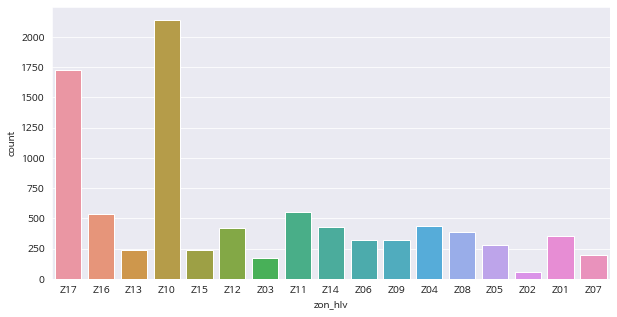

In [15]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.countplot(br['zon_hlv'])
print(br['zon_hlv'].value_counts())

               br_c  zon_mcls
zon_hlv cop_c                
Z01     A02       3         3
        A03       9         9
        A04     242       242
        A05      15        15
        B01       1         1
...             ...       ...
Z17     C01      24        24
        C02       3         3
        D01     190       190
        D02      96        96
        E01      11        11

[153 rows x 2 columns]


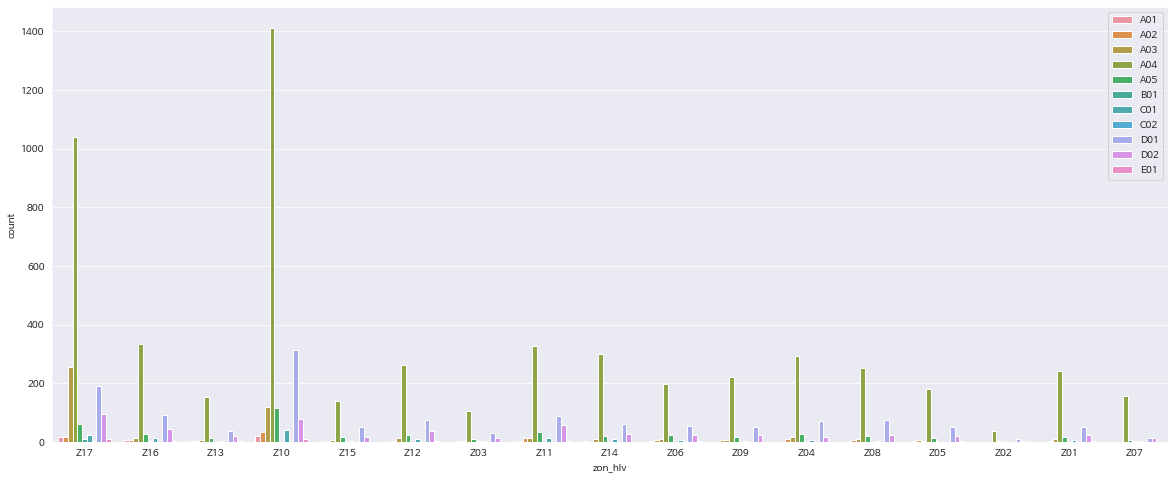

In [16]:
fig, axs = plt.subplots(figsize = (20, 8))
sns.countplot(data = br, x = "zon_hlv", hue = "cop_c", ax = axs)
axs.legend(loc = "upper right")
print(br.groupby(["zon_hlv", "cop_c"]).count())

### 2) COP별 BR 개수

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


A04    5646
D01    1311
D02     535
A03     487
A05     440
C01     140
A02     116
A01      66
E01      43
B01      20
C02       4
Name: cop_c, dtype: int64


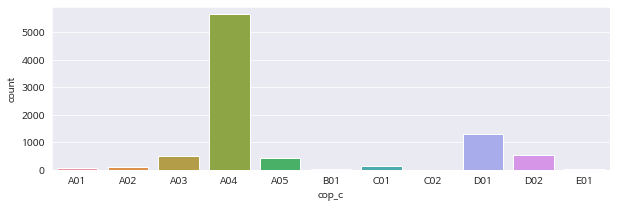

In [17]:
fig, axs = plt.subplots(figsize = (10, 3))
sns.countplot(br['cop_c'])
print(br['cop_c'].value_counts())

# 4. *COP* 
 제휴사 이용 정보
- `B01` : 숙박업종
- `C01~02` : 엔터테인먼트
  - C01 : 영화관, C02 : 놀이 공원 등등
- `D01~02` : F&B
- `E01` : 렌탈업종   

## A.데이터 확인

In [18]:
cop

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,2021-10-26,12,60000,1,26,10,0,2
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,2021-11-06,10,17100,5,06,11,1,2
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,2021-02-11,12,136500,3,11,02,1,3
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,2021-09-20,10,34200,0,20,09,1,2
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,2021-10-10,09,2500,6,10,10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,2021-11-16,2021-11-16,14,2000,1,16,11,0,2
248300,M058650684,21111619C023223432,C02,C020002,1,2021-11-16,2021-11-16,19,26900,1,16,11,0,2
248301,M014154595,21121209C015324520,C01,C010087,2,2021-12-12,2021-12-12,09,2000,6,12,12,1,3
248302,M510878172,21112719C013369102,C01,C010007,2,2021-11-27,2021-11-27,19,6000,5,27,11,1,2


In [19]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   cust       248304 non-null  object        
 1   rct_no     248304 non-null  object        
 2   cop_c      248304 non-null  object        
 3   br_c       248249 non-null  object        
 4   chnl_dv    248304 non-null  int64         
 5   de_dt      248304 non-null  datetime64[ns]
 6   vst_dt     248304 non-null  datetime64[ns]
 7   de_hr      248304 non-null  object        
 8   buy_am     248304 non-null  int64         
 9   de_dow     248304 non-null  int64         
 10  de_day     248304 non-null  object        
 11  de_month   248304 non-null  object        
 12  de_hday    248304 non-null  int64         
 13  de_season  248304 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(7)
memory usage: 26.5+ MB


### 결측치 확인
- `E01` 온라인 거래의 경우 매장 정보가 없기 때문에 `br_c`가 없음
  - 온라인 매장 : `Z18`로 대체

In [20]:
cop.isnull().sum()

cust          0
rct_no        0
cop_c         0
br_c         55
chnl_dv       0
de_dt         0
vst_dt        0
de_hr         0
buy_am        0
de_dow        0
de_day        0
de_month      0
de_hday       0
de_season     0
dtype: int64

In [21]:
print(f"결측치 개수 : {len(cop.loc[cop.br_c.isnull()])}")
cop.loc[cop.br_c.isnull()].head(5)

결측치 개수 : 55


,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season
15016,M630101164,21042615E011416951,E01,NaN,2,2021-04-26,2021-04-26,15,100000,0,26,04,0,0
21186,M313325679,21020312E011619104,E01,NaN,2,2021-02-03,2021-02-03,12,127520,2,03,02,0,3
23873,M793953321,21021921E015310194,E01,NaN,2,2021-02-19,2021-02-19,21,121740,4,19,02,0,3
30631,M678403253,21060909E010937719,E01,NaN,2,2021-06-09,2021-06-09,09,3200,2,09,06,0,1
36269,M494040767,21101514E015540811,E01,NaN,2,2021-10-15,2021-10-15,14,41141,4,15,10,0,2


In [100]:
cop.loc[cop.cop_c == "E01"].chnl_dv.value_counts()

1    6199
2      55
Name: chnl_dv, dtype: int64

### 원소 개수 확인

In [24]:
cop.nunique()

cust          21769
rct_no       248304
cop_c             6
br_c           2029
chnl_dv           2
de_dt           369
vst_dt          366
de_hr            24
buy_am         9420
de_dow            7
de_day           31
de_month         12
de_hday           2
de_season         4
dtype: int64

## B. 제휴사/점포/지역 기준

In [25]:
cop_br = cop.merge(br, on = "br_c", how = 'left')
cop_br.drop(columns = ["cop_c_y"], inplace = True)
cop_br.rename(columns = {"cop_c_x" : "cop_c"}, inplace = True)
cop_br

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season,zon_hlv,zon_mcls
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,2021-10-26,12,60000,1,26,10,0,2,Z17,Z17024
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,2021-11-06,10,17100,5,06,11,1,2,Z17,Z17024
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,2021-02-11,12,136500,3,11,02,1,3,Z17,Z17024
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,2021-09-20,10,34200,0,20,09,1,2,Z17,Z17024
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,2021-10-10,09,2500,6,10,10,1,2,Z17,Z17018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,2021-11-16,2021-11-16,14,2000,1,16,11,0,2,Z17,Z17018
248300,M058650684,21111619C023223432,C02,C020002,1,2021-11-16,2021-11-16,19,26900,1,16,11,0,2,Z17,Z17018
248301,M014154595,21121209C015324520,C01,C010087,2,2021-12-12,2021-12-12,09,2000,6,12,12,1,3,Z14,Z14005
248302,M510878172,21112719C013369102,C01,C010007,2,2021-11-27,2021-11-27,19,6000,5,27,11,1,2,Z17,Z17013


### 1) 결제 금액 분포

#### 제휴사별 결제 금액 분포
  - `숙박업종(B01)` 의 이상치 : 고급 호텔에서의 결제

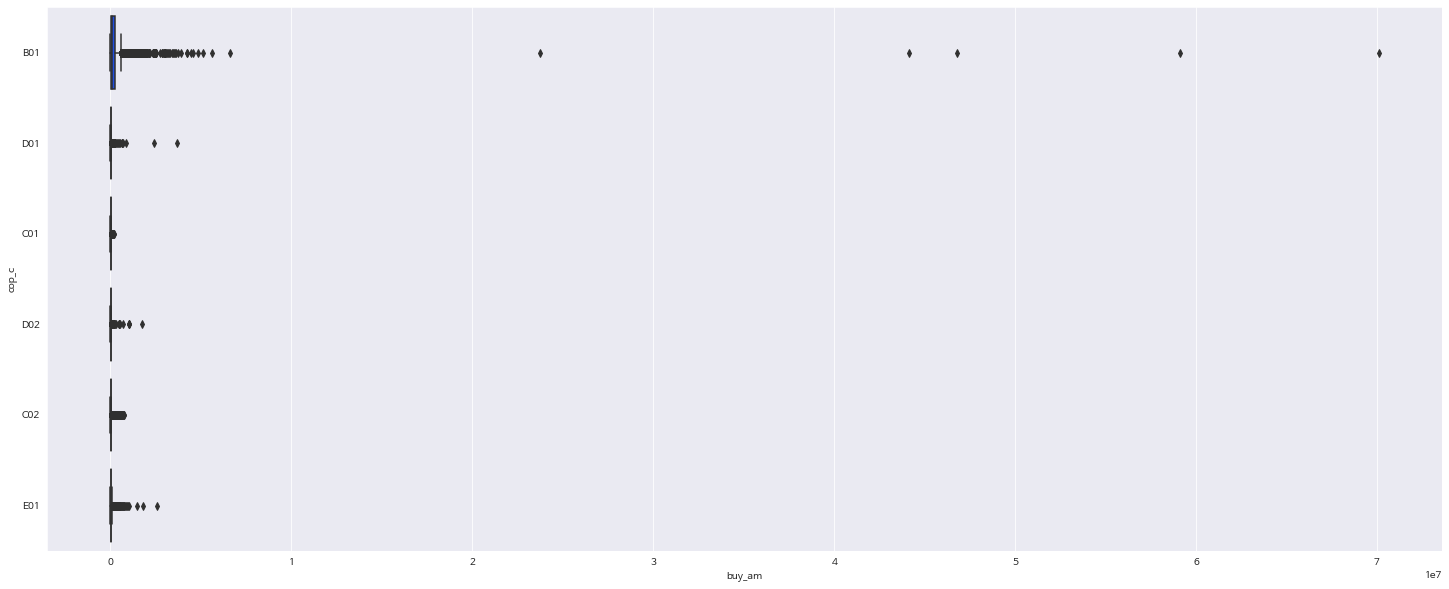

In [26]:
fig, axs = plt.subplots(figsize = (25, 10))
sns.boxplot(data = cop_br, y = "cop_c", x = "buy_am")

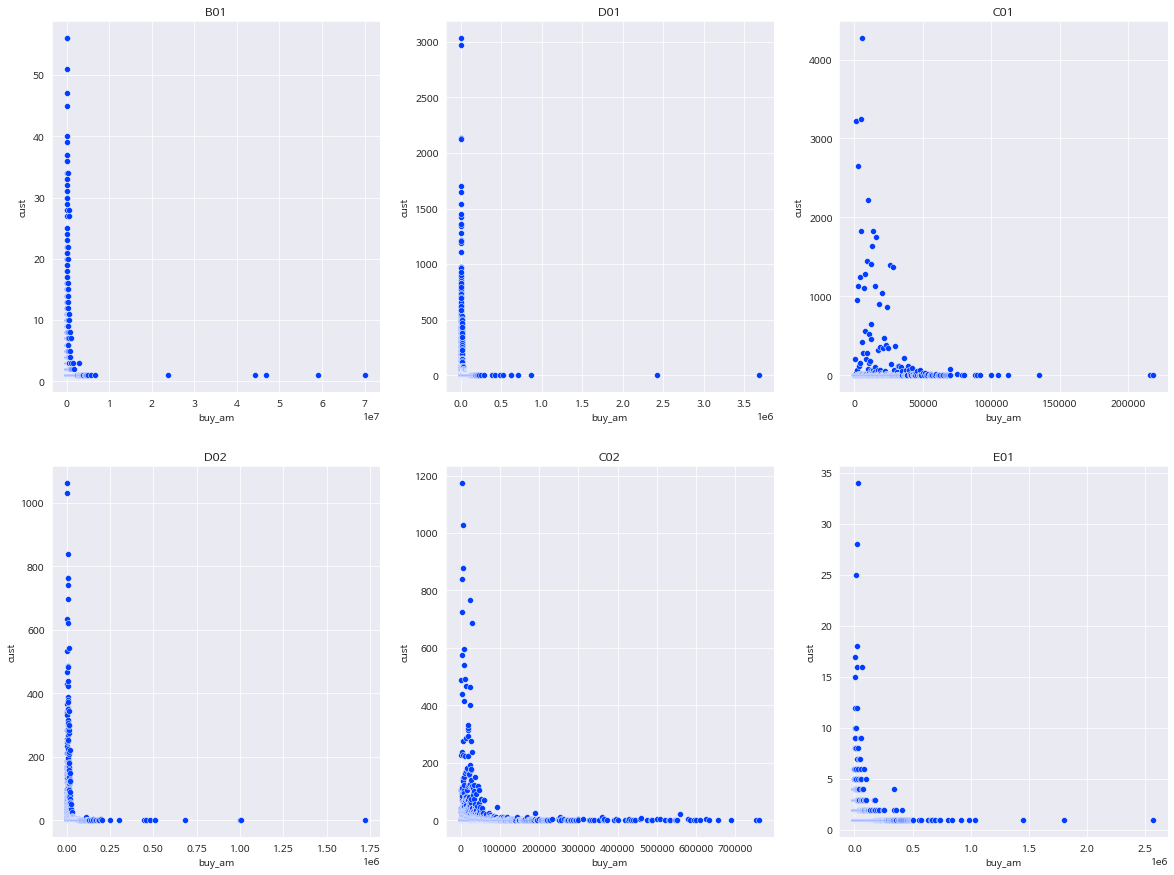

In [27]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
temp = cop_br.groupby(["cop_c", "buy_am"])['cust'].count().reset_index()
name = cop_br.cop_c.unique()

for row in range(2):
  for col in range(3):
    ax = axs[row][col]
    name_temp = name[row * 3 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.scatterplot(data = data, x = "buy_am", y = "cust", ax = ax)
    ax.set_title(f"{name_temp}")

##### 시간 기준

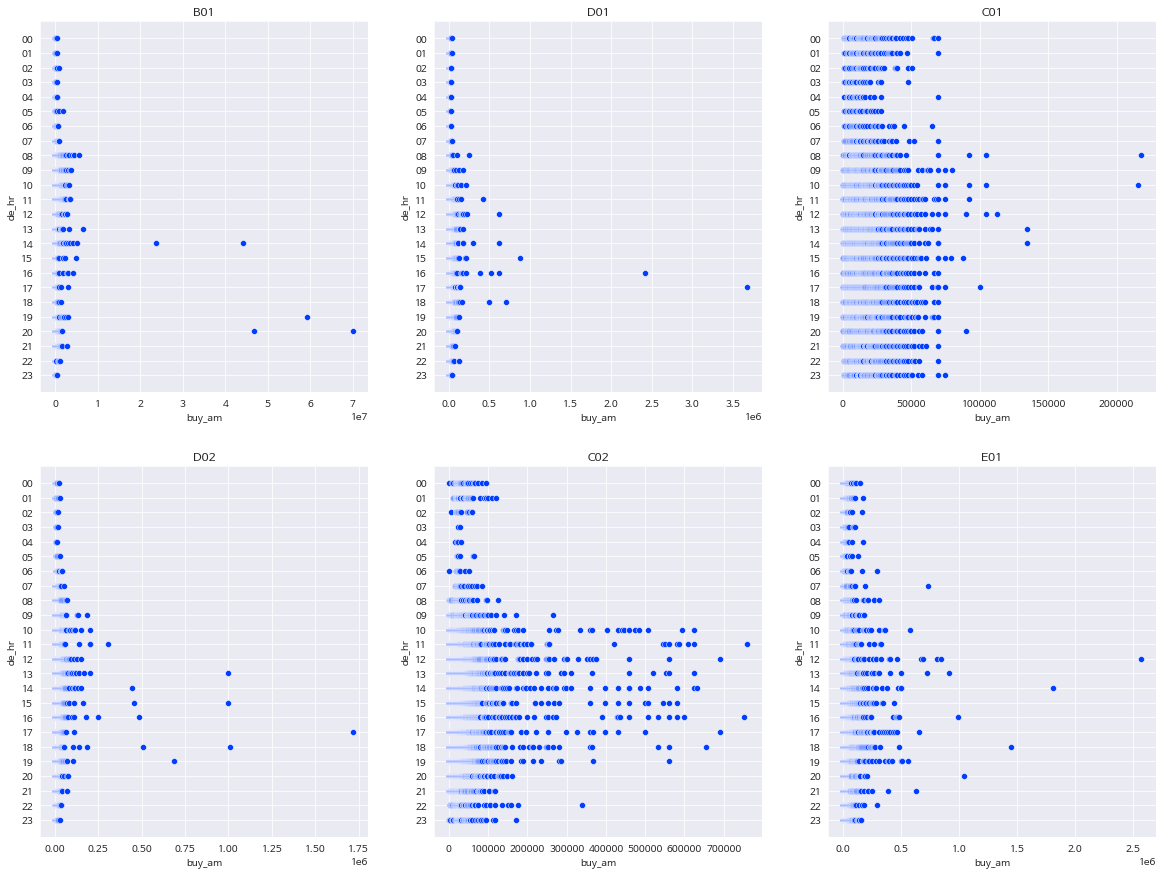

In [28]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
temp = cop_br.groupby(["cop_c", "de_hr","buy_am"])['cust'].count().reset_index()
name = cop_br.cop_c.unique()

for row in range(2):
  for col in range(3):
    ax = axs[row][col]
    name_temp = name[row * 3 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.scatterplot(data = data, x = "buy_am", y = "de_hr", ax = ax)
    ax.set_title(f"{name_temp}")

##### 요일 기준

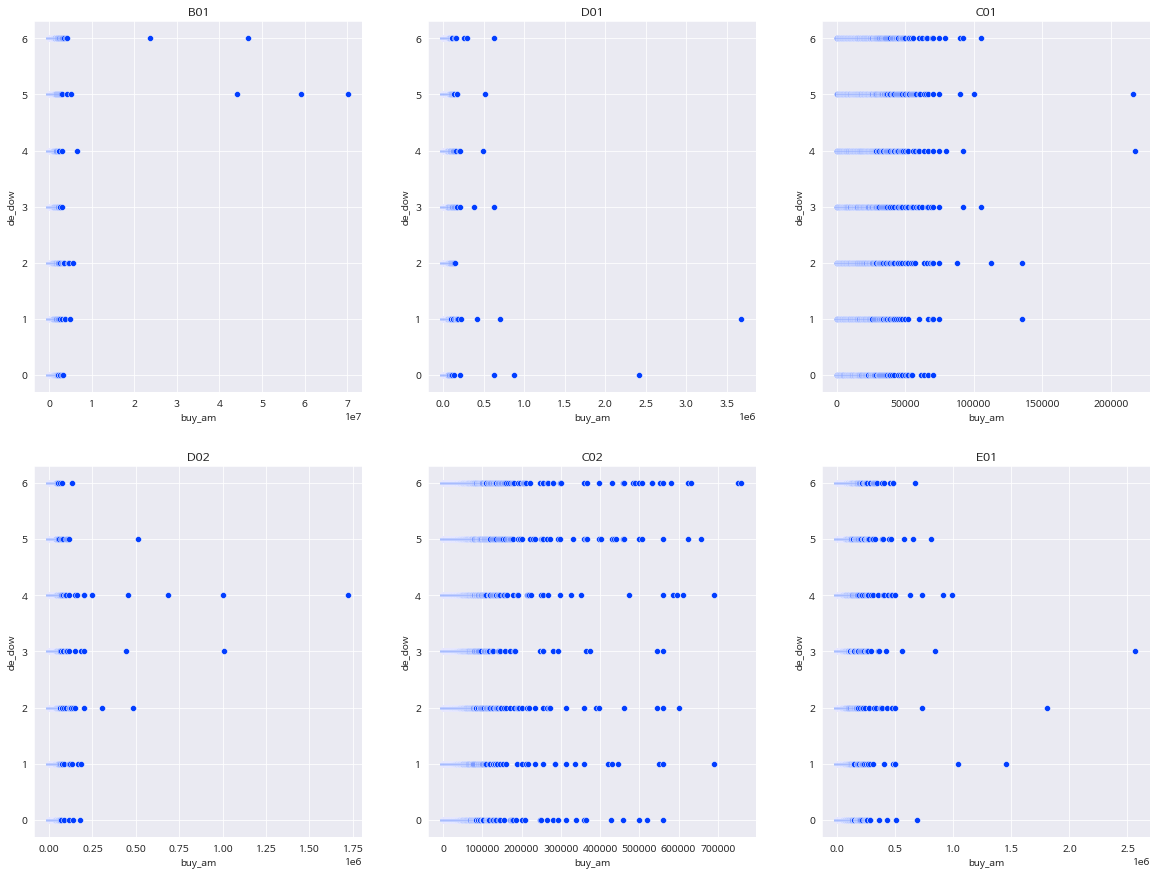

In [29]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
temp = cop_br.groupby(["cop_c", "de_dow","buy_am"])['cust'].count().reset_index()
name = cop_br.cop_c.unique()

for row in range(2):
  for col in range(3):
    ax = axs[row][col]
    name_temp = name[row * 3 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.scatterplot(data = data, x = "buy_am", y = "de_dow", ax = ax)
    ax.set_title(f"{name_temp}")

##### 평일 / 휴일 기준

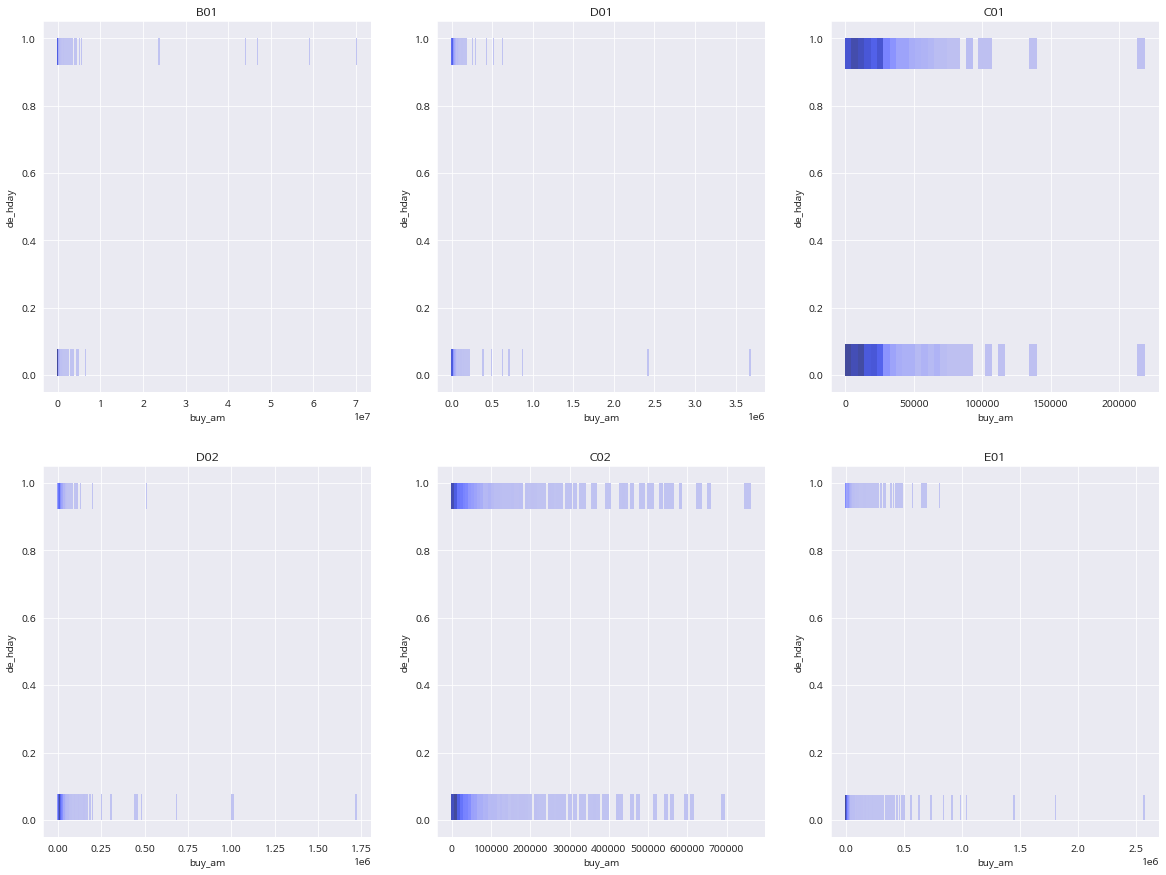

In [30]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
temp = cop_br.groupby(["cop_c", "de_hday","buy_am"])['cust'].count().reset_index()
name = cop_br.cop_c.unique()

for row in range(2):
  for col in range(3):
    ax = axs[row][col]
    name_temp = name[row * 3 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.histplot(data = data, x = "buy_am", y = "de_hday", ax = ax)
    ax.set_title(f"{name_temp}")

#### 점포별 결제 금액 분포

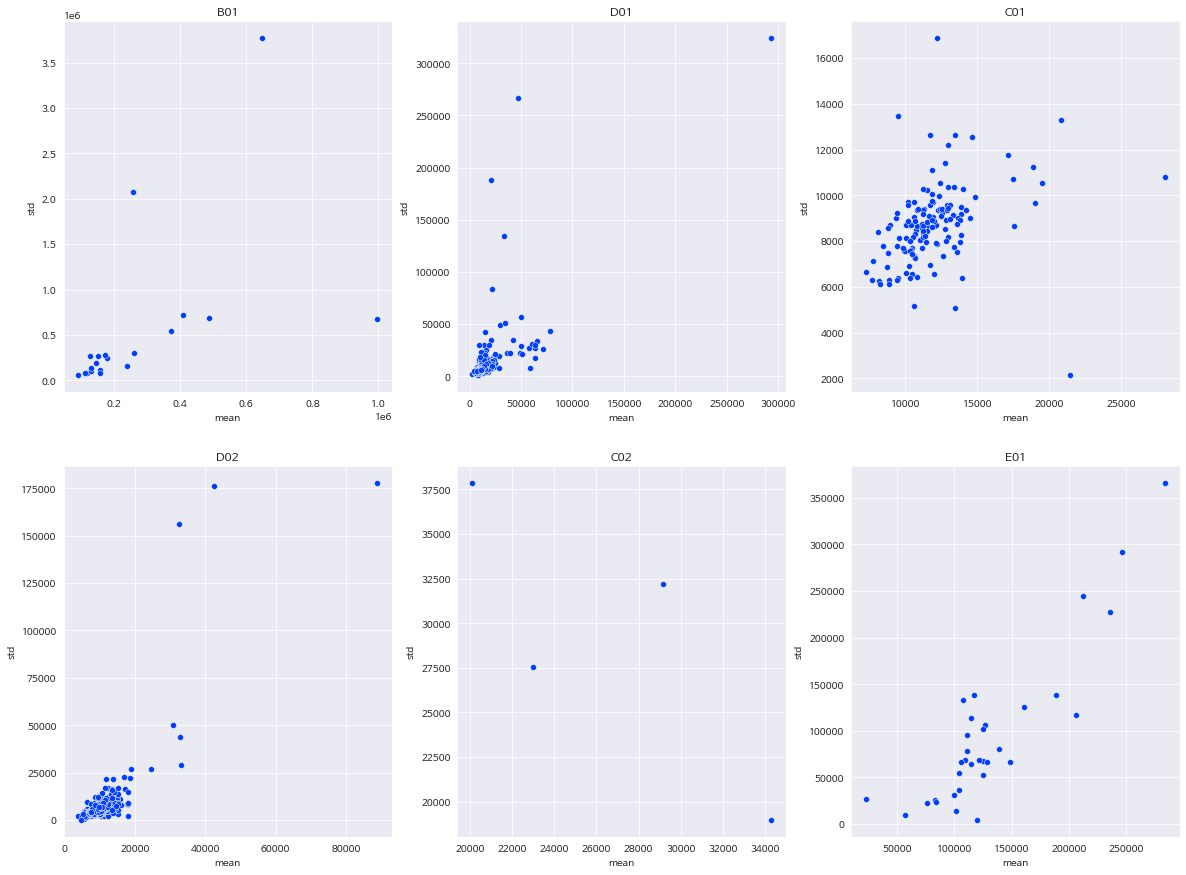

In [32]:
fig, axs = plt.subplots(2, 3, figsize = (20, 15))
temp = cop_br.groupby(["cop_c", "br_c"])['buy_am'].agg(["mean", "std"]).reset_index()
name = cop_br.cop_c.unique()

for row in range(2):
  for col in range(3):
    ax = axs[row][col]
    name_temp = name[row * 3 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.scatterplot(data = data, x = "mean", y = "std", ax = ax)
    ax.set_title(f"{name_temp}")

#### 지역별 결제 금액 분포

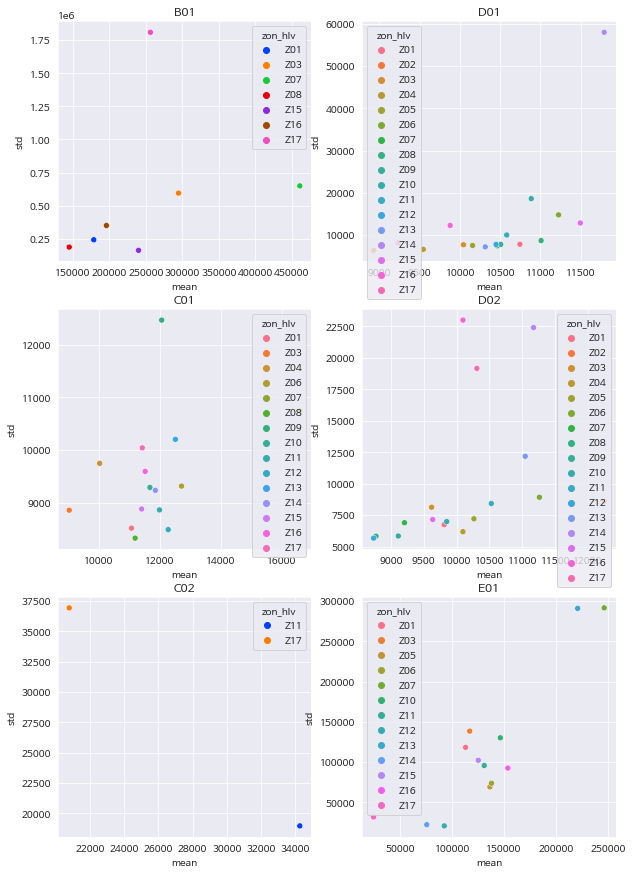

In [33]:
fig, axs = plt.subplots(3, 2, figsize = (10, 15))
temp = cop_br.groupby(["cop_c", "zon_hlv"])['buy_am'].agg(["mean", "std"]).reset_index()
name = cop_br.cop_c.unique()

for row in range(3):
  for col in range(2):
    ax = axs[row][col]
    name_temp = name[row * 2 + col]

    data = temp.loc[temp.cop_c == name_temp]
    sns.scatterplot(data = data, x = "mean", y = "std", ax = ax, hue = "zon_hlv")
    ax.set_title(f"{name_temp}")

### 2) 판매량 정보

#### 제휴사별 판매량
- 온/오프라인

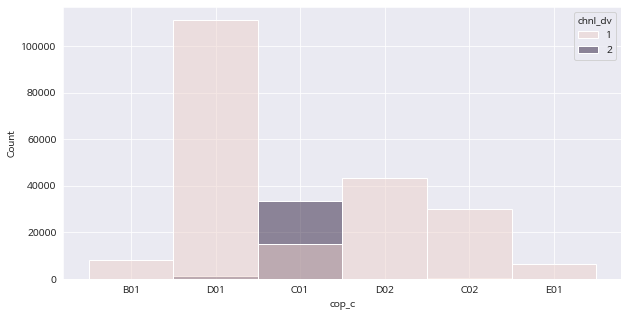

In [34]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.histplot(data = cop_br, x = "cop_c", hue = "chnl_dv")

#### 제휴사별 판매 금액

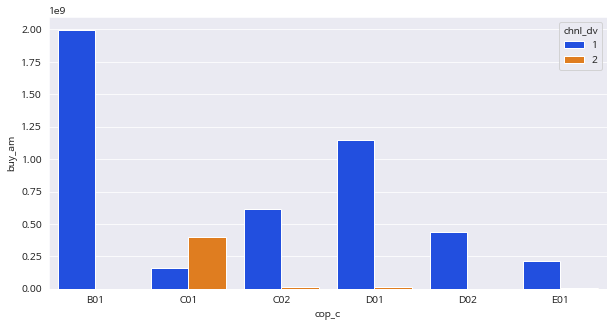

In [35]:
fig, axs = plt.subplots(figsize = (10, 5))
temp=cop_br.groupby(['cop_c','chnl_dv']).buy_am.sum().reset_index()
sns.barplot(data = temp, x = "cop_c", y='buy_am',hue = "chnl_dv")

#### 제휴사별 판매 금액 / 판매량

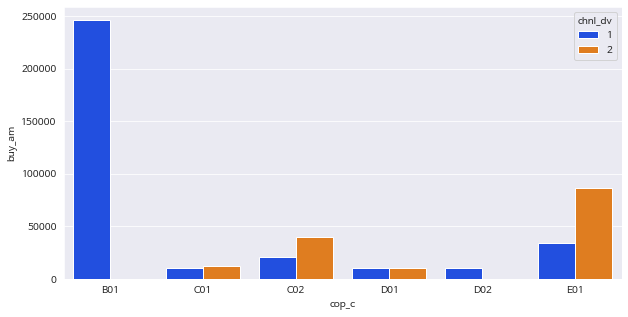

In [36]:
fig, axs = plt.subplots(figsize = (10, 5))
temp=cop_br.groupby(['cop_c','chnl_dv'])["buy_am"].agg("mean").reset_index()
temp
sns.barplot(data = temp, x = "cop_c", y='buy_am',hue = "chnl_dv")

#### 지역별 판매량

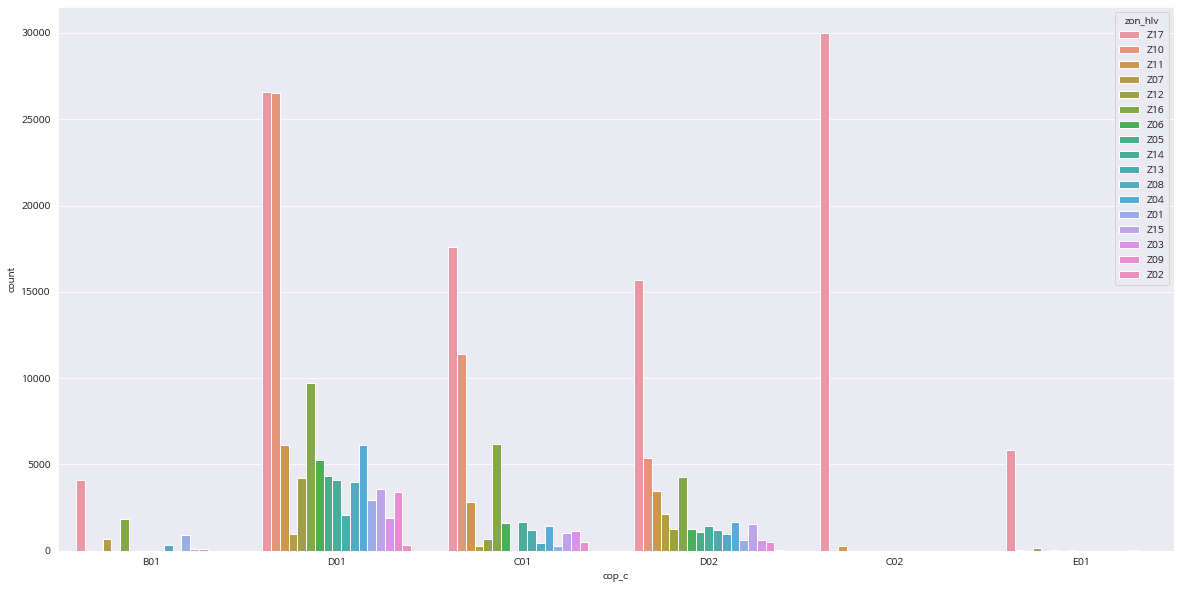

In [37]:
fig, axs = plt.subplots(figsize = (20, 10))
sns.countplot(data = cop_br, x = "cop_c", hue = "zon_hlv")

#### 지역별 판매 금액

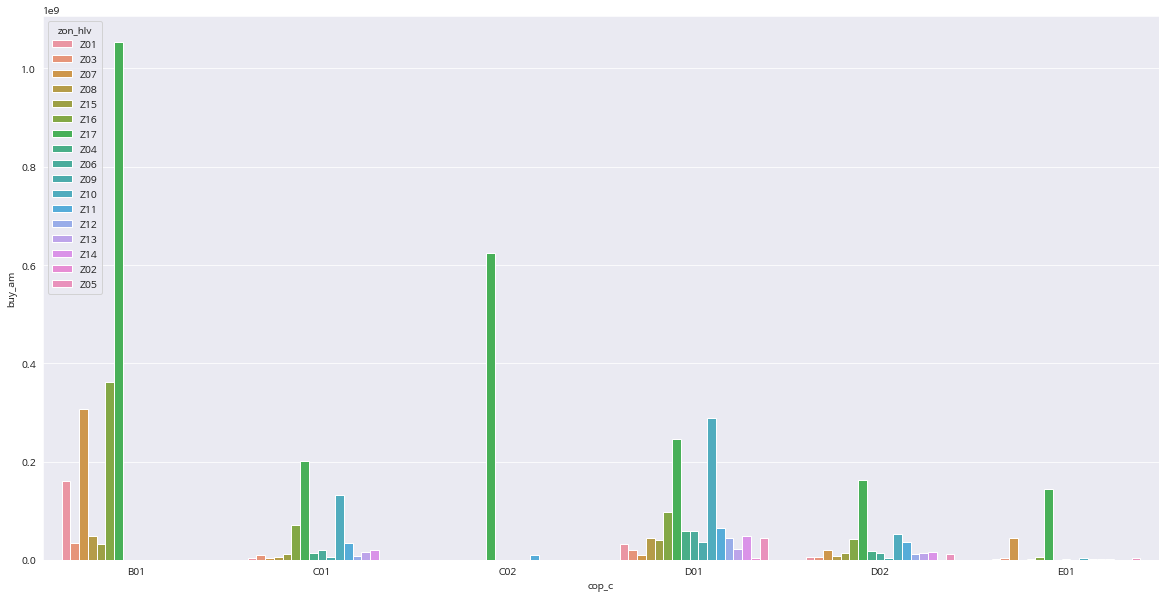

In [38]:
fig, axs = plt.subplots(figsize = (20, 10))
temp=cop_br.groupby(['cop_c','zon_hlv']).buy_am.sum().reset_index()
sns.barplot(data = temp, x = "cop_c", y='buy_am',hue='zon_hlv')

##C. 고객 기준

###1) 고객 방문 수

#### 시간 기준

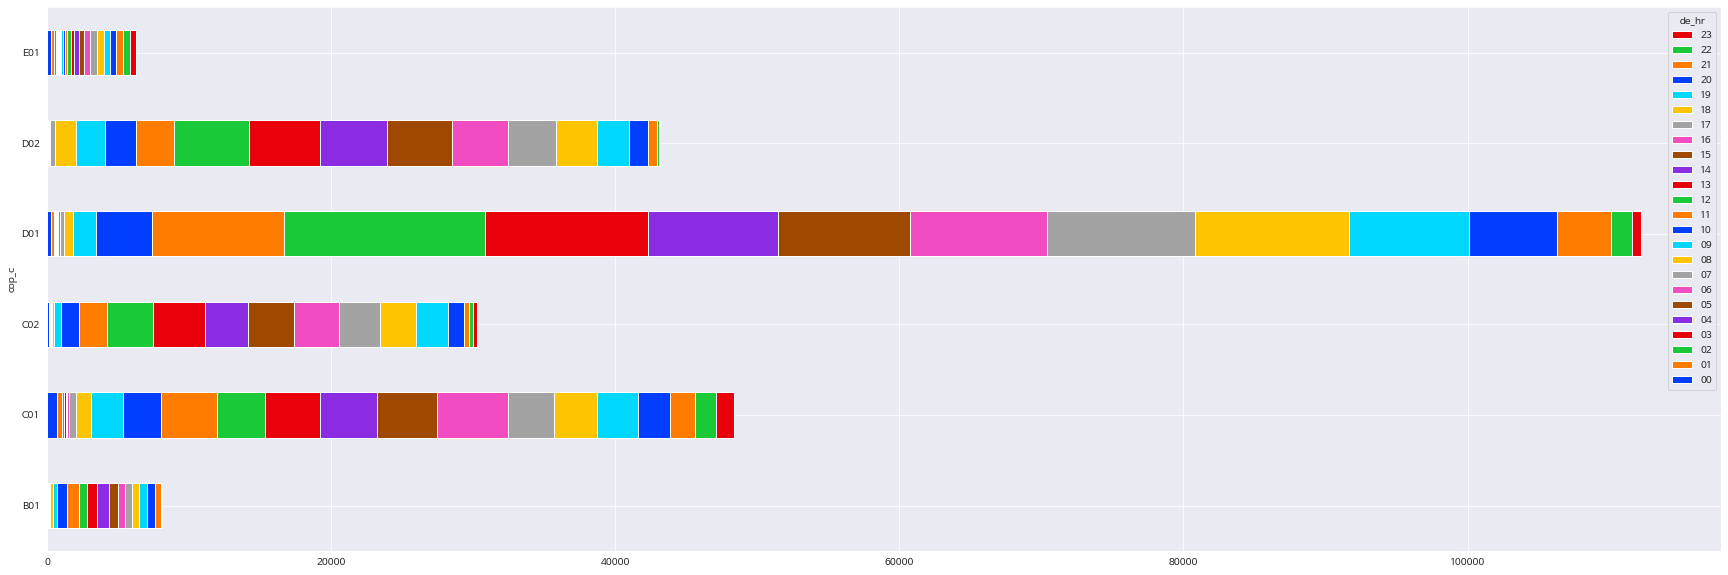

In [39]:
temp = cop_br.groupby(["cop_c", "de_hr"])['cust'].count().reset_index()
temp = temp.pivot(index = "cop_c", columns = "de_hr", values = "cust")
temp.plot.barh(stacked = True, legend = 'reverse', figsize = (30, 10))

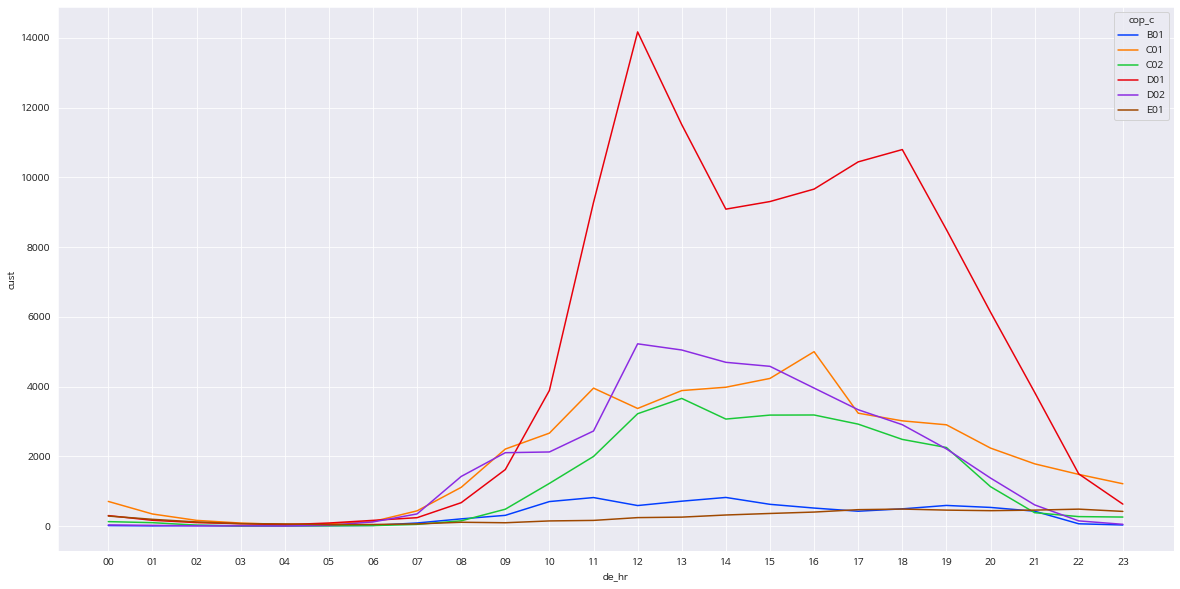

In [40]:
fig, axs = plt.subplots(figsize = (20, 10))
temp = cop_br.groupby(["cop_c", "de_hr"])['cust'].count().reset_index()
sns.lineplot(data = temp, x = "de_hr", y = "cust", hue = "cop_c")

#### 요일 기준

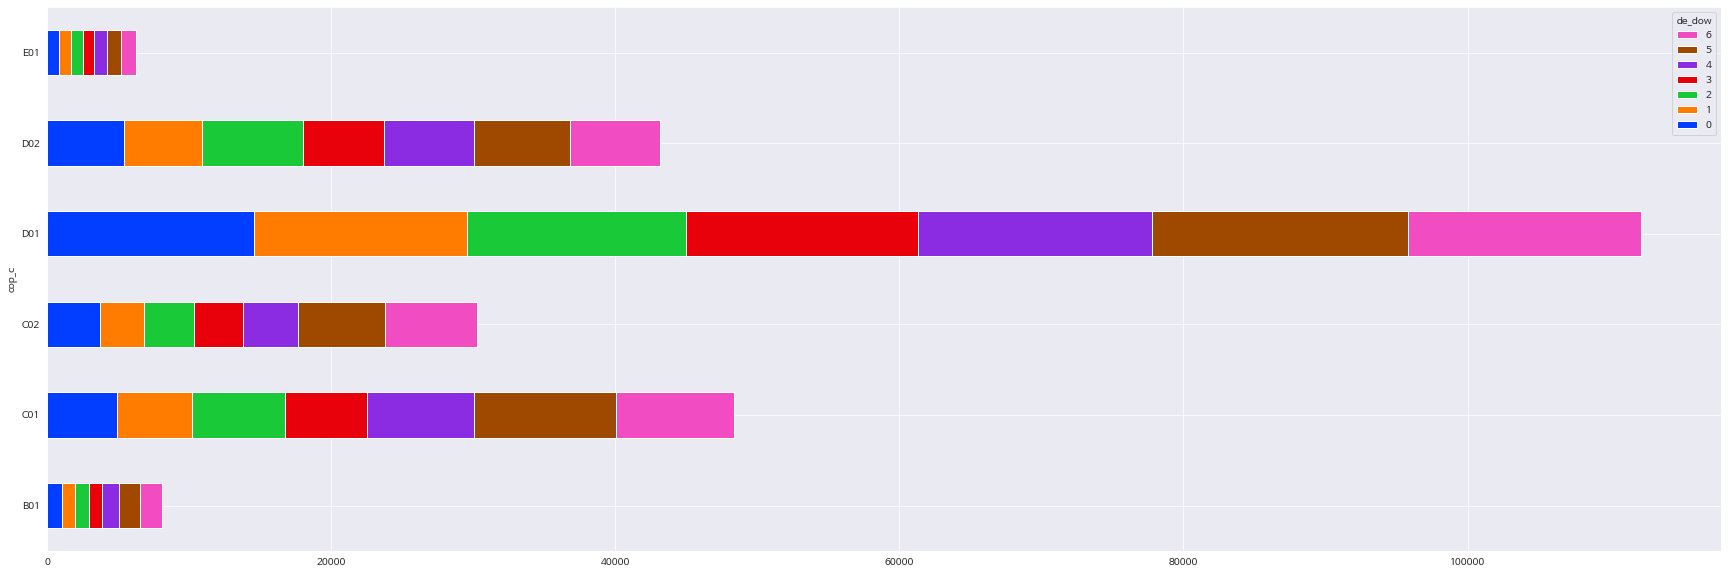

In [41]:
temp = cop_br.groupby(["cop_c", "de_dow"])['cust'].count().reset_index()
temp = temp.pivot(index = "cop_c", columns = "de_dow", values = "cust")
temp.plot.barh(stacked = True, legend = 'reverse', figsize = (30, 10))

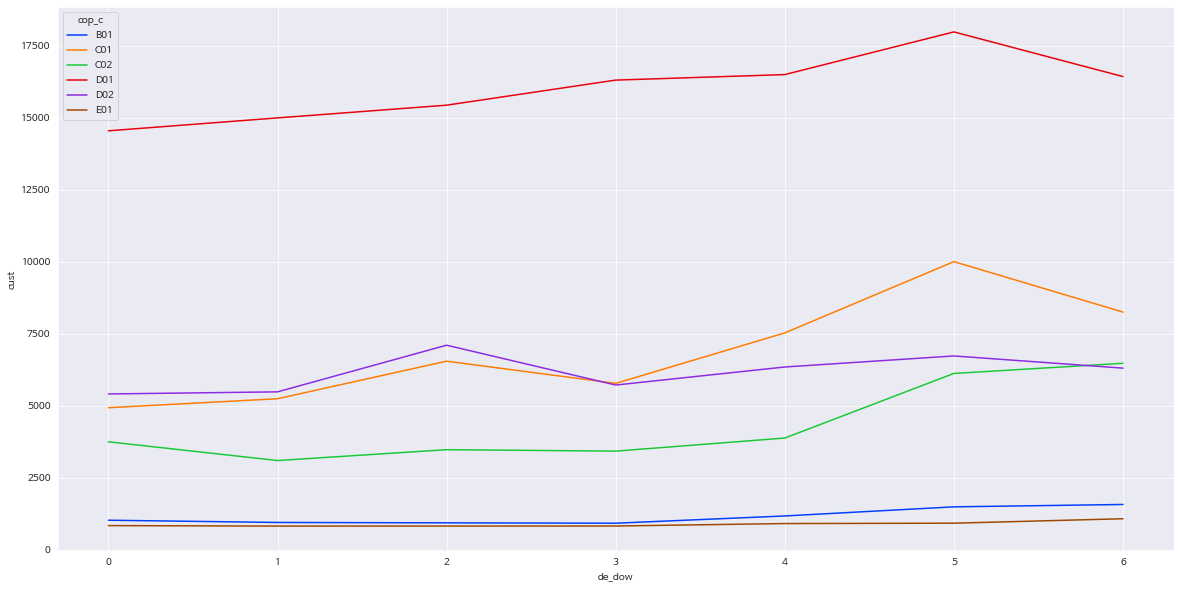

In [42]:
fig, axs = plt.subplots(figsize = (20, 10))
temp = cop_br.groupby(["cop_c", "de_dow"])['cust'].count().reset_index()
sns.lineplot(data = temp, x = "de_dow", y = "cust", hue = "cop_c", sort = False)

#### 평일/휴일 기준

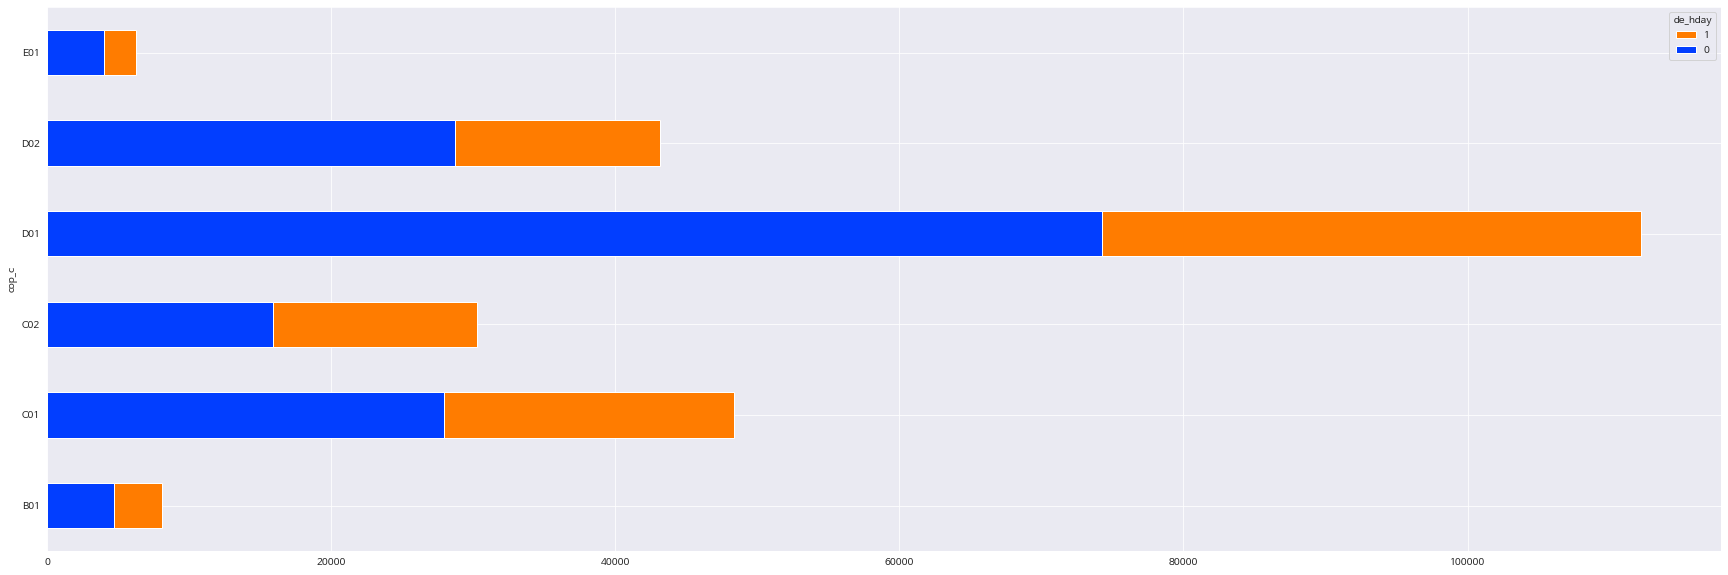

In [43]:
temp = cop_br.groupby(["cop_c", "de_hday"])['cust'].count().reset_index()
temp = temp.pivot(index = "cop_c", columns = "de_hday", values = "cust")
temp.plot.barh(stacked = True, legend = 'reverse', figsize = (30, 10))

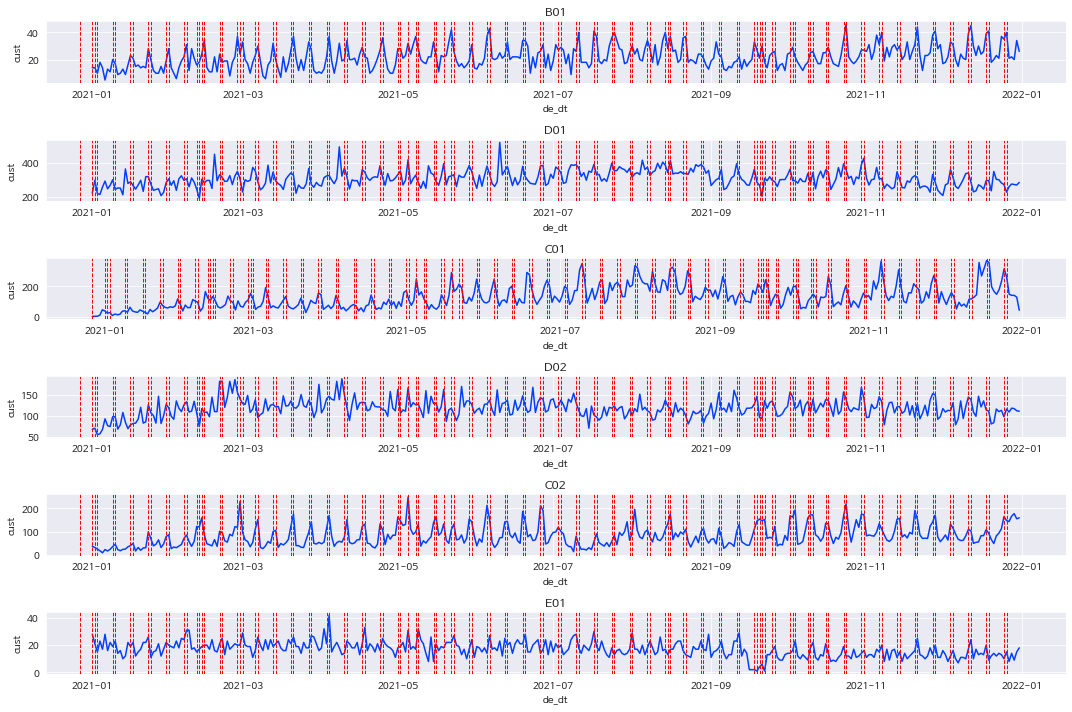

In [44]:
fig, axs = plt.subplots(6, 1, figsize = (15, 10))
temp = cop_br.groupby(["de_dt", "cop_c"])['cust'].count().reset_index()
name = cop_br.cop_c.unique()

for i in range(6):
  ax = axs[i]
  temp_name = name[i]
  temp2 = temp.loc[temp.cop_c == temp_name]
  sns.lineplot(data = temp2, x = "de_dt", y = "cust", ax = ax)
  for j in cop_br.loc[cop_br.de_hday == 1].de_dt.unique():
    ax.axvline(x=j, color='r', linestyle='--', linewidth=1)
  ax.set_title(f"{temp_name}")

fig.tight_layout()

#### 월별

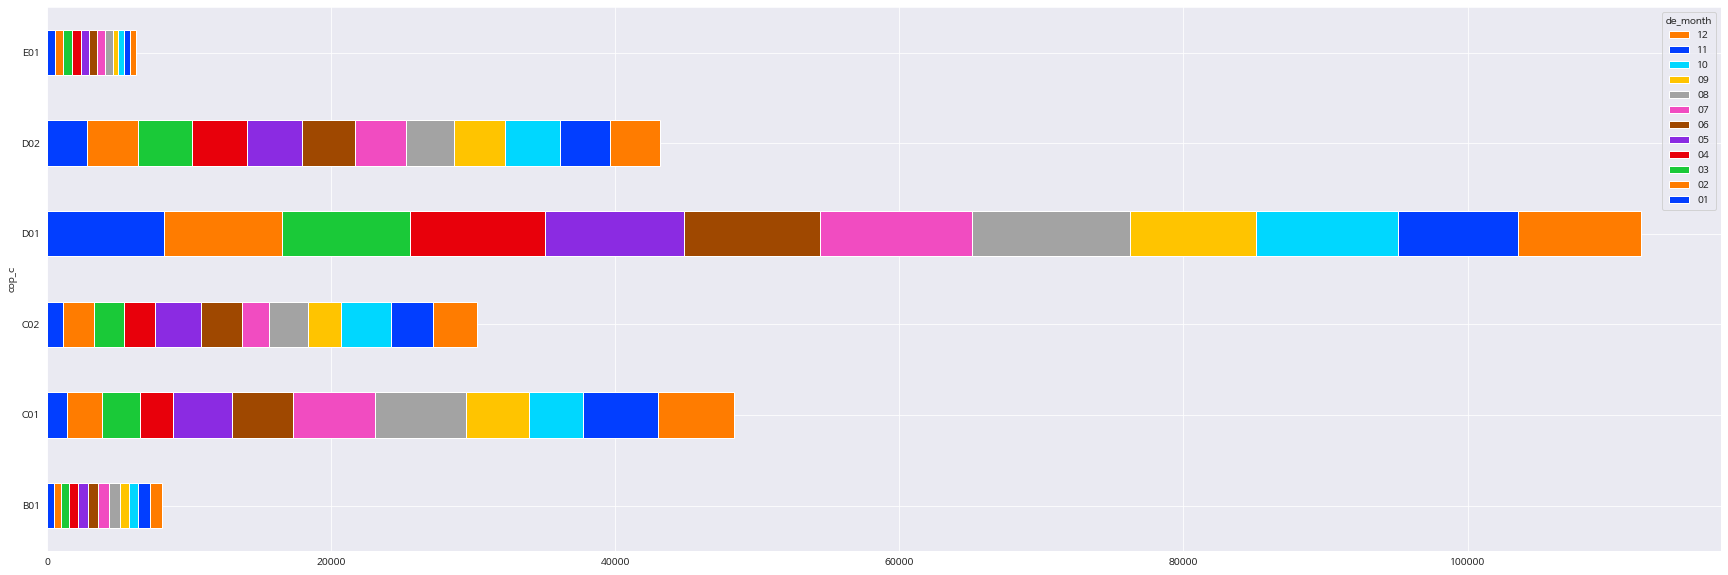

In [45]:
temp = cop_br.groupby(["cop_c", "de_month"])['cust'].count().reset_index()
temp = temp.pivot(index = "cop_c", columns = "de_month", values = "cust")
temp.plot.barh(stacked = True, legend = 'reverse', figsize = (30, 10))

#### 계절별

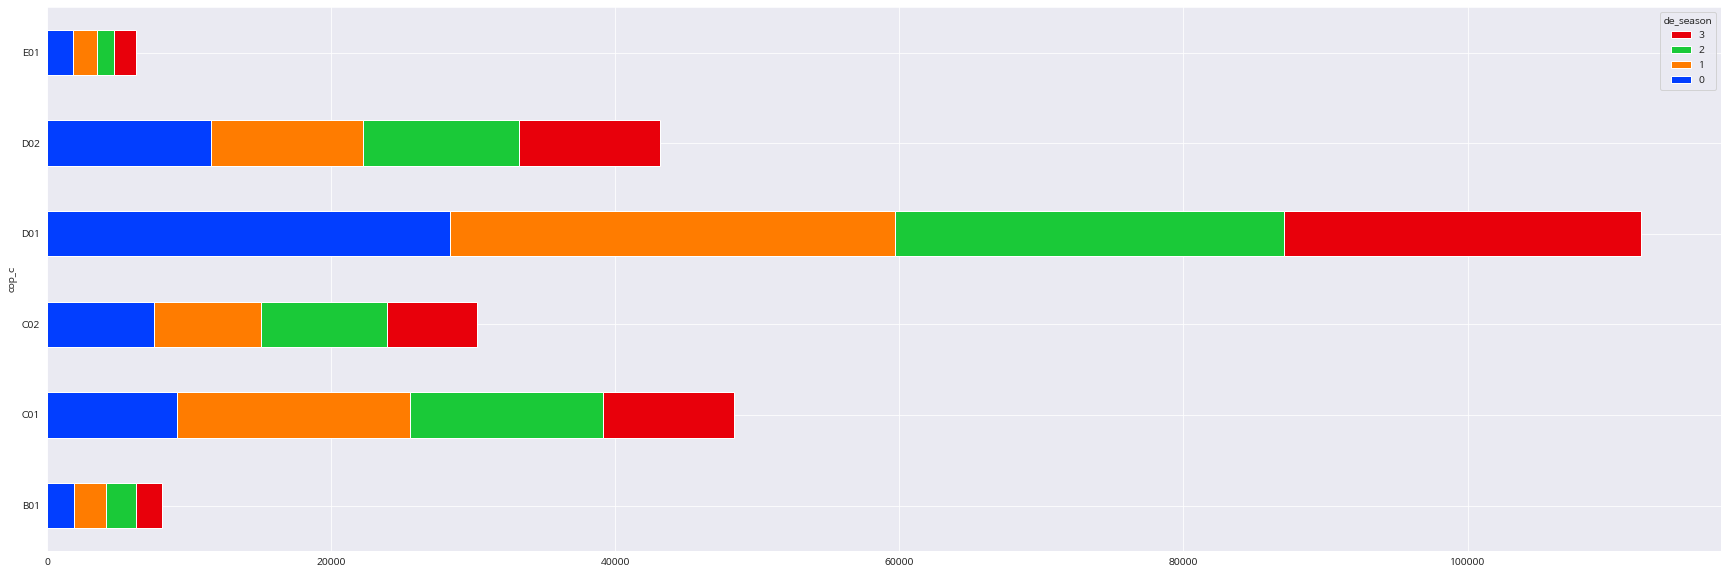

In [46]:
temp = cop_br.groupby(["cop_c", "de_season"])['cust'].count().reset_index()
temp = temp.pivot(index = "cop_c", columns = "de_season", values = "cust")
temp.plot.barh(stacked = True, legend = 'reverse', figsize = (30, 10))

#### 연간

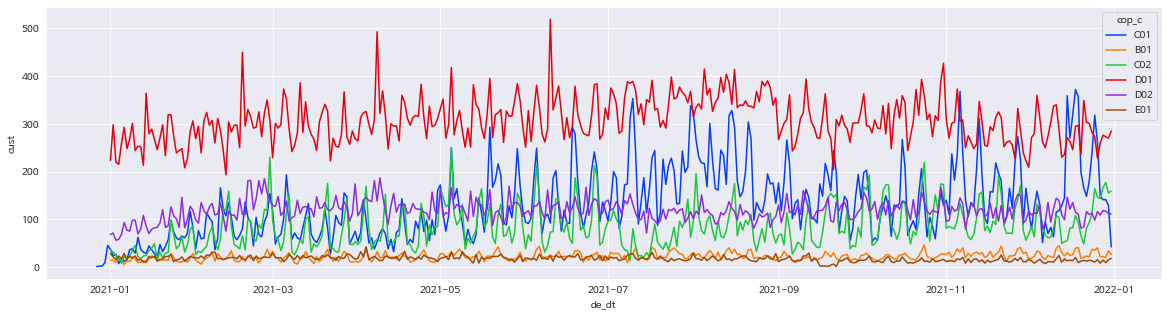

In [47]:
fig, axs = plt.subplots(figsize = (20, 5))
temp = cop_br.groupby(["de_dt", "cop_c"])['cust'].count().reset_index()
sns.lineplot(data = temp, x = "de_dt", y = "cust", ax = axs, hue = 'cop_c')

### 2) 고객 인구 특성 기준

#### 제휴사 거래 고객 비율
- 연령별/성별

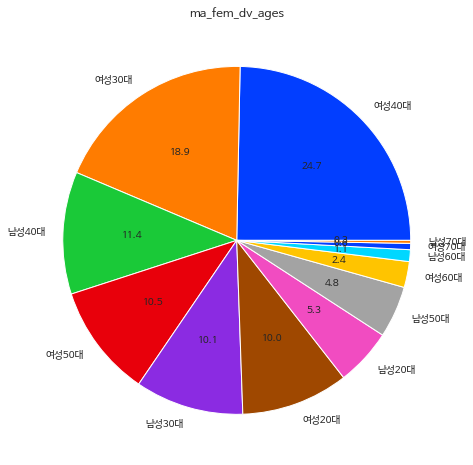

In [48]:
temp = demo.loc[demo.cust.isin(cop_br.cust.unique())]
pie_chart(temp, "ma_fem_dv_ages",(8, 8))

- 지역별 비율

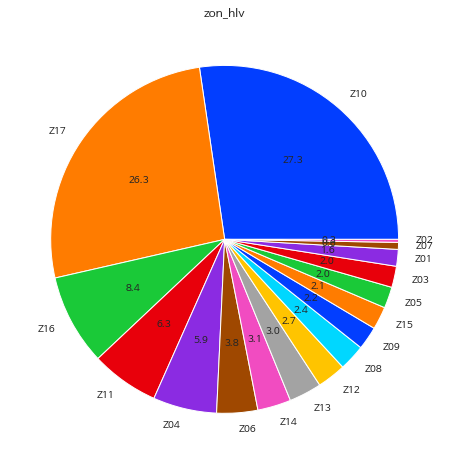

In [49]:
temp = demo.loc[demo.cust.isin(pdde.cust.unique())]
pie_chart(temp, "zon_hlv",(8, 8))

#### 집계 거래 수

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season,zon_hlv,zon_mcls,ma_fem_dv,ages,zon_hlv_user,ma_fem_dv_ages
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,2021-10-26,12,60000,1,26,10,0,2,Z17,Z17024,남성,70대,Z17,남성70대
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,2021-11-06,10,17100,5,06,11,1,2,Z17,Z17024,남성,70대,Z17,남성70대
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,2021-02-11,12,136500,3,11,02,1,3,Z17,Z17024,남성,70대,Z17,남성70대
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,2021-09-20,10,34200,0,20,09,1,2,Z17,Z17024,남성,70대,Z17,남성70대
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,2021-10-10,09,2500,6,10,10,1,2,Z17,Z17018,남성,70대,Z17,남성70대


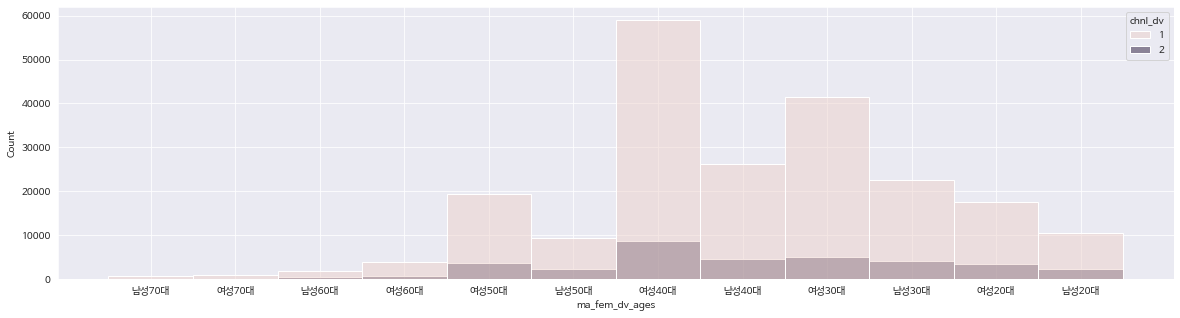

In [50]:
cop_br_demo = cop_br.merge(demo, how = 'left', on = 'cust')
cop_br_demo.rename(columns = {"zon_hlv_x" : "zon_hlv", "zon_hlv_y" : "zon_hlv_user"}, inplace = True)
cop_br_demo['ma_fem_dv_ages'] = cop_br_demo['ma_fem_dv'] + cop_br_demo['ages']
display(cop_br_demo.head(5))

fig, axs = plt.subplots(figsize=(20, 5))
sns.histplot(data = cop_br_demo, x = "ma_fem_dv_ages", hue = "chnl_dv")

#### 구매 개수

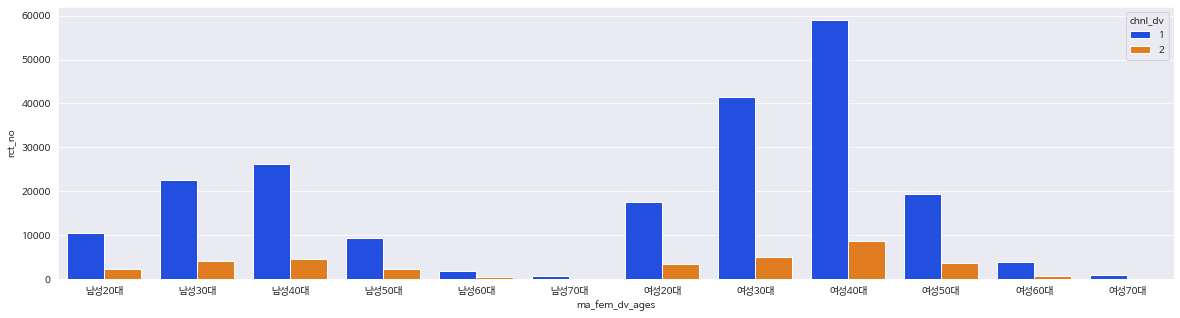

In [51]:
fig, axs = plt.subplots(figsize=(20, 5))
temp=cop_br_demo.groupby(['ma_fem_dv_ages','chnl_dv']).rct_no.count().reset_index()
sns.barplot(data = temp, x = "ma_fem_dv_ages", y='rct_no', hue = "chnl_dv")

#### 구매 금액

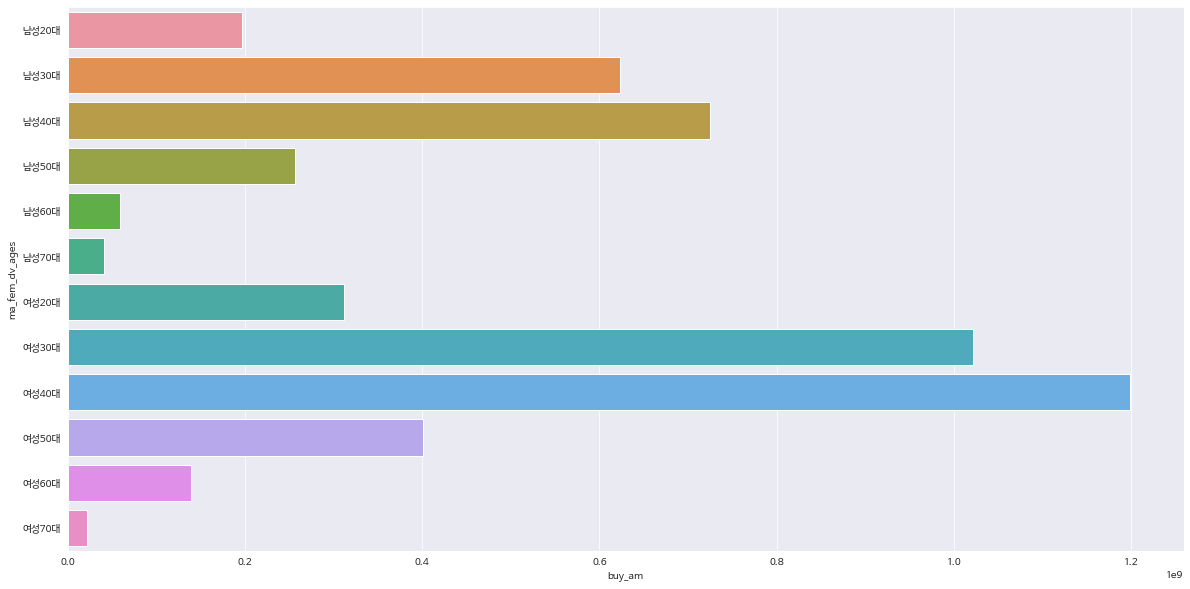

In [52]:
fig, axs = plt.subplots(figsize = (20, 10))
temp=cop_br_demo.groupby(['ma_fem_dv_ages']).buy_am.sum().reset_index()
sns.barplot(data = temp, x = "buy_am", y = "ma_fem_dv_ages")

#### 제휴사별 집계 거래 수

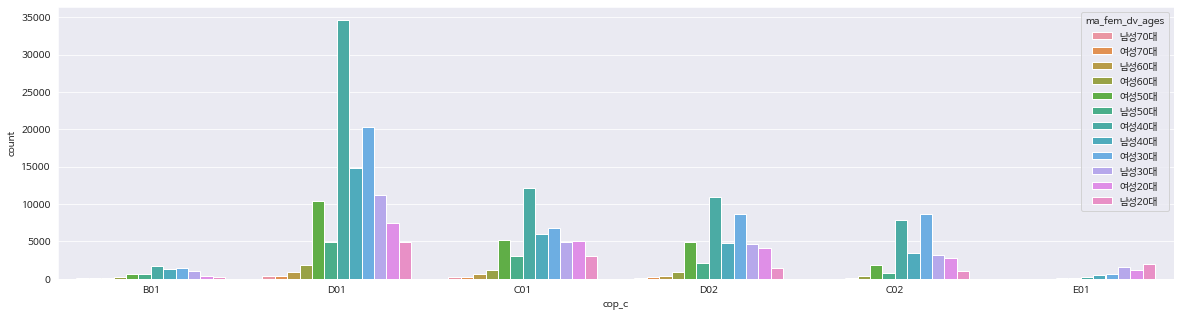

In [53]:
fig, axs = plt.subplots(figsize=(20, 5))
sns.countplot(data = cop_br_demo, x = "cop_c", hue = "ma_fem_dv_ages")

#### 제휴사별 지출 비율

- 금액 합계

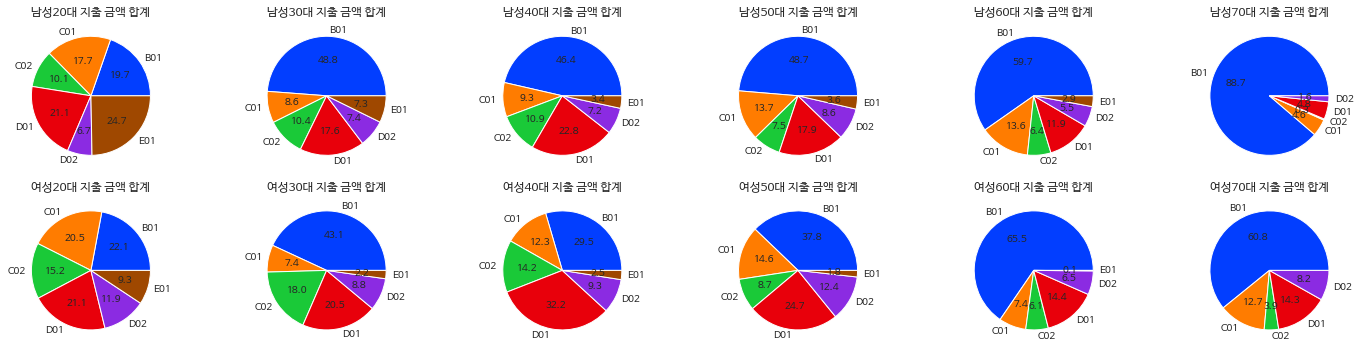

In [54]:
temp = cop_br_demo.groupby(["ma_fem_dv_ages", "cop_c"])['buy_am'].agg(["sum"]).reset_index()
name = temp.ma_fem_dv_ages.unique()

fig, axs = plt.subplots(2, 6, figsize = (20, 5))
for row in range(2):
  for col in range(6):
    ax = axs[row][col]
    temp_name = name[row*6 + col]
    temp2 = temp.loc[temp.ma_fem_dv_ages == temp_name]

    pie_idx, pie_value = temp2["cop_c"], temp2['sum']
    ax.pie(pie_value, labels = pie_idx, autopct = "%.1f")
    ax.set_title(f"{temp_name} 지출 금액 합계")

fig.tight_layout()

- 금액 평균

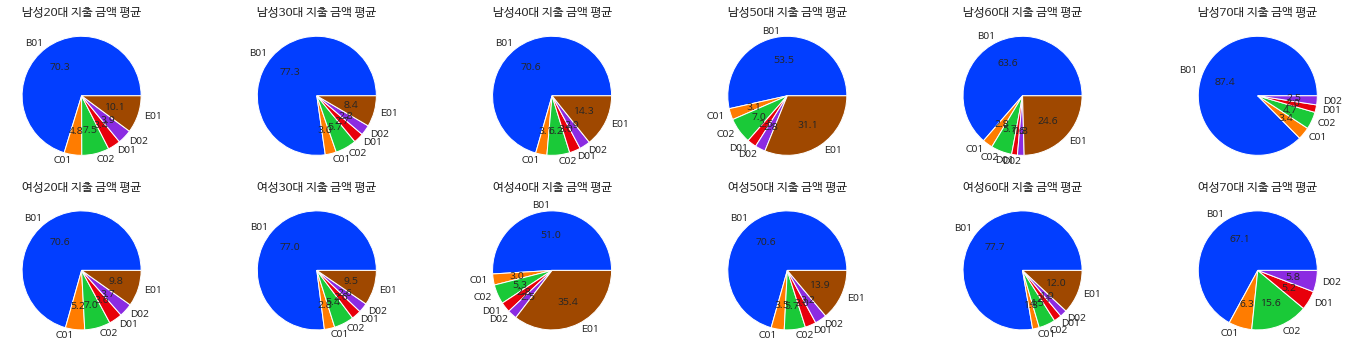

In [55]:
temp = cop_br_demo.groupby(["ma_fem_dv_ages", "cop_c"])['buy_am'].agg(["mean"]).reset_index()
name = temp.ma_fem_dv_ages.unique()

fig, axs = plt.subplots(2, 6, figsize = (20, 5))
for row in range(2):
  for col in range(6):
    ax = axs[row][col]
    temp_name = name[row*6 + col]
    temp2 = temp.loc[temp.ma_fem_dv_ages == temp_name]

    pie_idx, pie_value = temp2["cop_c"], temp2['mean']
    ax.pie(pie_value, labels = pie_idx, autopct = "%.1f")
    ax.set_title(f"{temp_name} 지출 금액 평균")

fig.tight_layout()

#### 날짜별 방문 고객

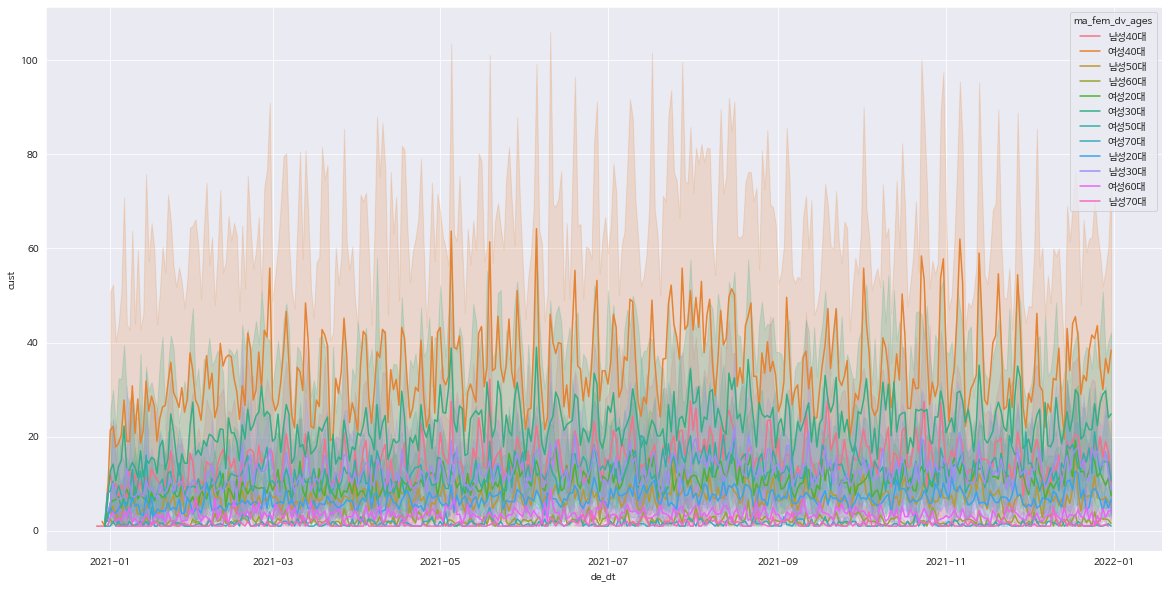

In [56]:
fig, axs = plt.subplots(figsize = (20, 10))
temp = cop_br_demo.groupby(["de_dt", "ma_fem_dv_ages","cop_c"])['cust'].count().reset_index()
sns.lineplot(data = temp, x = "de_dt", y = "cust", ax = axs, hue = 'ma_fem_dv_ages')

###3) 구매 / 방문 주기

- `한번 이상` 구매한 고객으로 구성
  - 한번 이상 제휴사를 이용한 유저 수 : 21769
  - 두번 이상 제휴사를 이용한 유저 수 : 18051
- 한번만 제휴사를 이용한 유저 수 : 3718

#### 제휴사 방문 주기

In [57]:
def get_period(x):
  temp = x[:]
  p = []
  for idx, t in enumerate(temp):
    if idx == 0:
      continue
    p.append((temp[idx] - temp[idx - 1]).days)
  
  p_mean = sum(p) / len(p)

  return p_mean

한번 이상 제휴사를 이용한 유저 수 : 21769
두번 이상 제휴사를 이용한 유저 수 : 18051
한번만 제휴사를 이용한 유저 수 : 3718


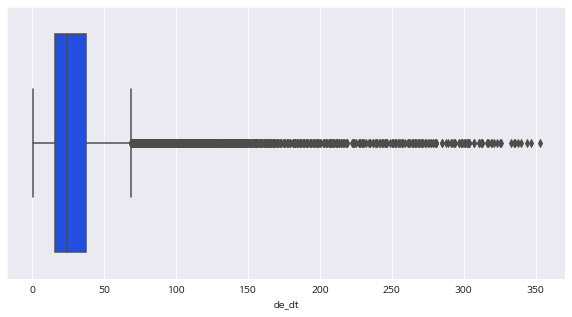

In [58]:
cop_br_demo = cop_br_demo.sort_values(by = ["cust", "de_dt"])
temp = cop_br_demo.groupby(["cust"])['de_dt'].apply(list).reset_index()
temp2 = len(temp)
print(f"한번 이상 제휴사를 이용한 유저 수 : {len(temp)}")
# 한번 이상 구매한 고객만으로 확인
temp.drop(temp.loc[temp.de_dt.apply(len) == 1].index, inplace = True)
temp['de_dt'] = temp['de_dt'].apply(lambda x : get_period(x))
temp = temp.loc[temp.de_dt > 0]
print(f"두번 이상 제휴사를 이용한 유저 수 : {len(temp)}")
print(f"한번만 제휴사를 이용한 유저 수 : {temp2 - len(temp)}")

fig, axs = plt.subplots(figsize = (10, 5))
sns.boxplot(data = temp, x = "de_dt", ax= axs)

#### 성별/연령별 방문 주기

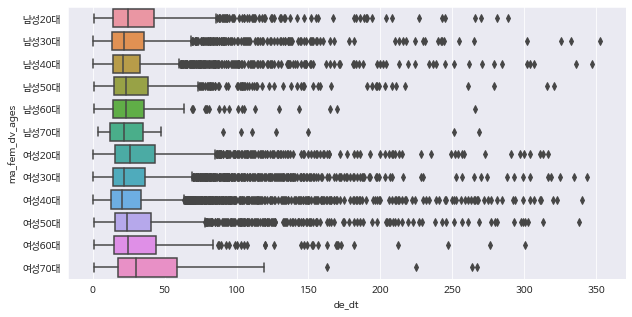

In [59]:
temp = temp.merge(demo, how = 'left')
temp2 = temp.groupby(["ma_fem_dv_ages", "de_dt"]).size().reset_index()
fig, axs = plt.subplots(figsize = (10, 5))
sns.boxplot(data = temp2, x = "de_dt", y = "ma_fem_dv_ages", ax= axs)

### 4) 예약일 - 방문일이 다른 경우

- `C01` 제휴사를 이용했을 경우에만 해당

In [60]:
vst_de_diff = cop_br_demo.loc[cop_br_demo.de_dt != cop_br_demo.vst_dt]
vst_de_diff

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,de_dow,de_day,de_month,de_hday,de_season,zon_hlv,zon_mcls,ma_fem_dv,ages,zon_hlv_user,ma_fem_dv_ages
67685,M000059535,21030317C012142421,C01,C010085,2,2021-03-03,2021-03-05,17,46000,2,03,03,0,0,Z12,Z12019,여성,30대,Z12,여성30대
22258,M000419293,21020918C014414586,C01,C010004,2,2021-02-09,2021-02-10,18,17000,1,09,02,0,3,Z17,Z17011,여성,40대,Z17,여성40대
22256,M000419293,21062910C015935450,C01,C010004,2,2021-06-29,2021-06-30,10,36000,1,29,06,0,1,Z17,Z17011,여성,40대,Z17,여성40대
146711,M000419293,21090422C014511700,C01,C010004,2,2021-09-04,2021-09-05,22,18000,5,04,09,1,2,Z17,Z17011,여성,40대,Z17,여성40대
146712,M000419293,21091914C011821717,C01,C010004,2,2021-09-19,2021-09-20,14,26000,6,19,09,1,2,Z17,Z17011,여성,40대,Z17,여성40대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13797,M999708287,21090215C014224753,C01,C010047,2,2021-09-02,2021-09-03,15,26000,3,02,09,0,2,Z10,Z10038,여성,40대,Z10,여성40대
219715,M999926092,21120222C012914863,C01,C010076,2,2021-12-02,2021-12-03,22,10000,3,02,12,0,3,Z15,Z15003,남성,30대,Z08,남성30대
135122,M999962961,21082822C011720870,C01,C010011,2,2021-08-28,2021-08-29,22,28000,5,28,08,1,1,Z17,Z17018,여성,50대,Z17,여성50대
10563,M999962961,21090116C011520480,C01,C010011,2,2021-09-01,2021-09-03,16,28000,2,01,09,0,2,Z17,Z17018,여성,50대,Z17,여성50대


In [132]:
cop_br_demo['day_diff'] = 0
cop_br_demo.loc[vst_de_diff.index, "day_diff"] = 1
vst_de_diff = cop_br_demo.loc[cop_br_demo.cop_c == "C01"]

##### 온/오프라인 거래 비율
  - `온라인` 거래가 절대 다수 차지

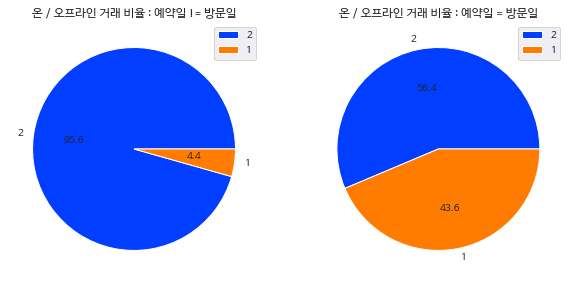

In [133]:
pie_idx, pie_value = vst_de_diff.loc[vst_de_diff.day_diff == 1].chnl_dv.value_counts().index, vst_de_diff.loc[vst_de_diff.day_diff == 1].chnl_dv.value_counts().values

fig, axs = plt.subplots(1, 2,figsize = (10, 5))
axs[0].pie(pie_value, labels = pie_idx, autopct = "%.1f")
axs[0].set_title("온 / 오프라인 거래 비율 : 예약일 != 방문일")
axs[0].legend()

pie_idx, pie_value = vst_de_diff.loc[vst_de_diff.day_diff == 0].chnl_dv.value_counts().index, vst_de_diff.loc[vst_de_diff.day_diff == 0].chnl_dv.value_counts().values

axs[1].pie(pie_value, labels = pie_idx, autopct = "%.1f")
axs[1].set_title("온 / 오프라인 거래 비율 : 예약일 = 방문일")
axs[1].legend()

##### 이용 고객 구성
- `20대 여성/남성`의 편차가 각각 2.7%, 1.2%로 높은 편

Text(0.5, 1.0, '이용 고객 정보 : 예약일 = 방문일')

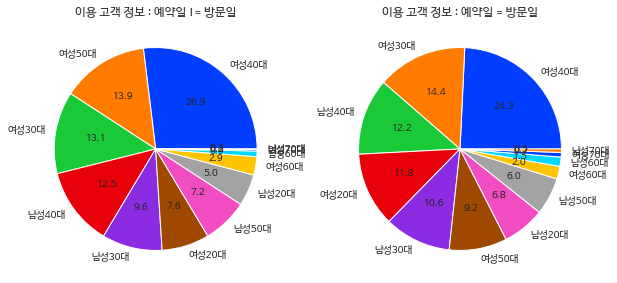

In [134]:
pie_idx, pie_value = vst_de_diff.loc[vst_de_diff.day_diff == 1].ma_fem_dv_ages.value_counts().index, vst_de_diff.loc[vst_de_diff.day_diff == 1].ma_fem_dv_ages.value_counts().values

fig, axs = plt.subplots(1, 2,figsize = (10, 5))
axs[0].pie(pie_value, labels = pie_idx, autopct = "%.1f")
axs[0].set_title("이용 고객 정보 : 예약일 != 방문일")

pie_idx, pie_value = vst_de_diff.loc[vst_de_diff.day_diff == 0].loc[cop_br_demo.cop_c == "C01"].ma_fem_dv_ages.value_counts().index, vst_de_diff.loc[vst_de_diff.day_diff == 0].ma_fem_dv_ages.value_counts().values

axs[1].pie(pie_value, labels = pie_idx, autopct = "%.1f")
axs[1].set_title("이용 고객 정보 : 예약일 = 방문일")

##### 이용 금액

In [148]:
vst_de_diff.loc[vst_de_diff.day_diff == 1].buy_am.describe()

count     15572.000000
mean      10384.224891
std       10149.963981
min         500.000000
25%        3000.000000
50%        6500.000000
75%       15000.000000
max      135000.000000
Name: buy_am, dtype: float64

In [149]:
vst_de_diff.loc[vst_de_diff.day_diff == 0].buy_am.describe()

count     32751.000000
mean      12122.635950
std        9350.337988
min         100.000000
25%        5000.000000
50%       10000.000000
75%       16000.000000
max      218000.000000
Name: buy_am, dtype: float64

In [150]:
from scipy import stats
lresult = stats.ttest_ind(np.log1p(vst_de_diff.loc[vst_de_diff.day_diff == 1].buy_am), np.log1p(vst_de_diff.loc[vst_de_diff.day_diff == 0].buy_am), equal_var = False)
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

LeveneResult(F) : -37.506 
p-value : 0.000


Text(0.5, 1.0, '예약일 = 방문일 이용 금액')

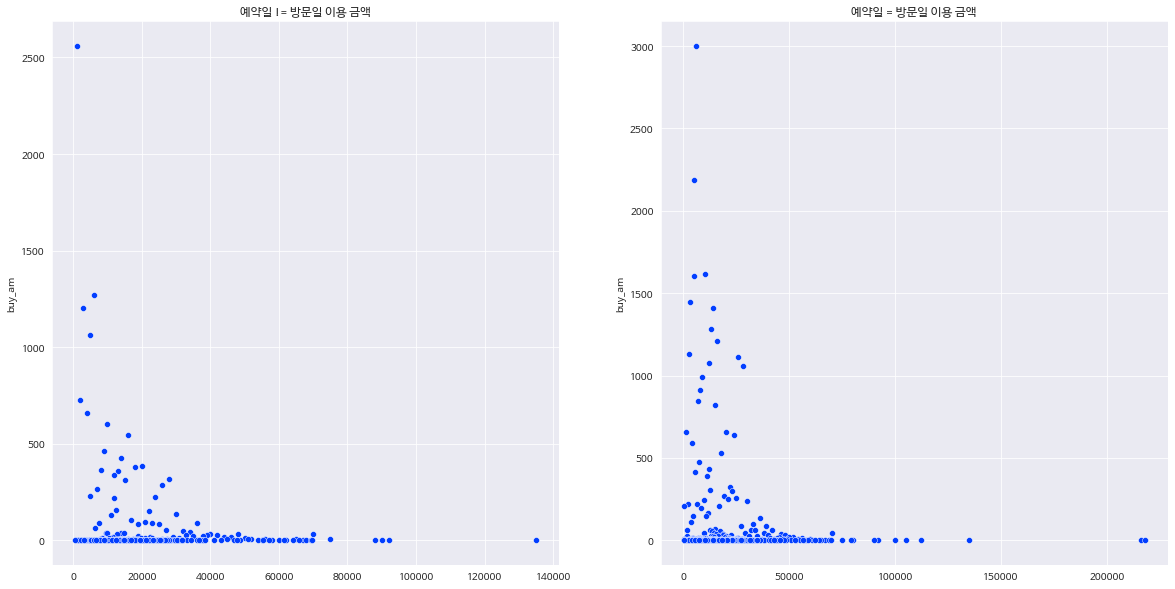

In [135]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))

sns.scatterplot(data = vst_de_diff.loc[vst_de_diff.day_diff == 1].buy_am.value_counts(), ax = axs[0])
axs[0].set_title("예약일 != 방문일 이용 금액")
sns.scatterplot(data = vst_de_diff.loc[vst_de_diff.day_diff == 0].buy_am.value_counts(), ax = axs[1])
axs[1].set_title("예약일 = 방문일 이용 금액")